In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

data=pd.read_csv(r"C:\Users\utkarsh.sharma\Documents\dsets\PIMA Indian diabetes\diabetes.csv")
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [2]:
#lets observe some bunch of values
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#Correlation between the variables/features
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

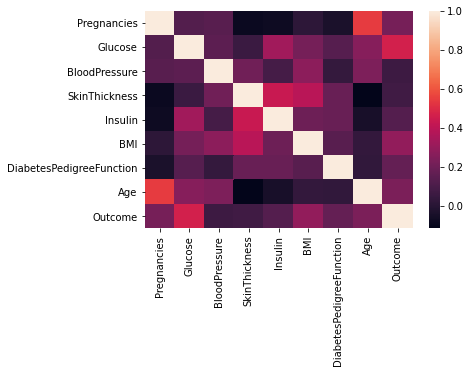

In [5]:
sns.heatmap(data.corr())

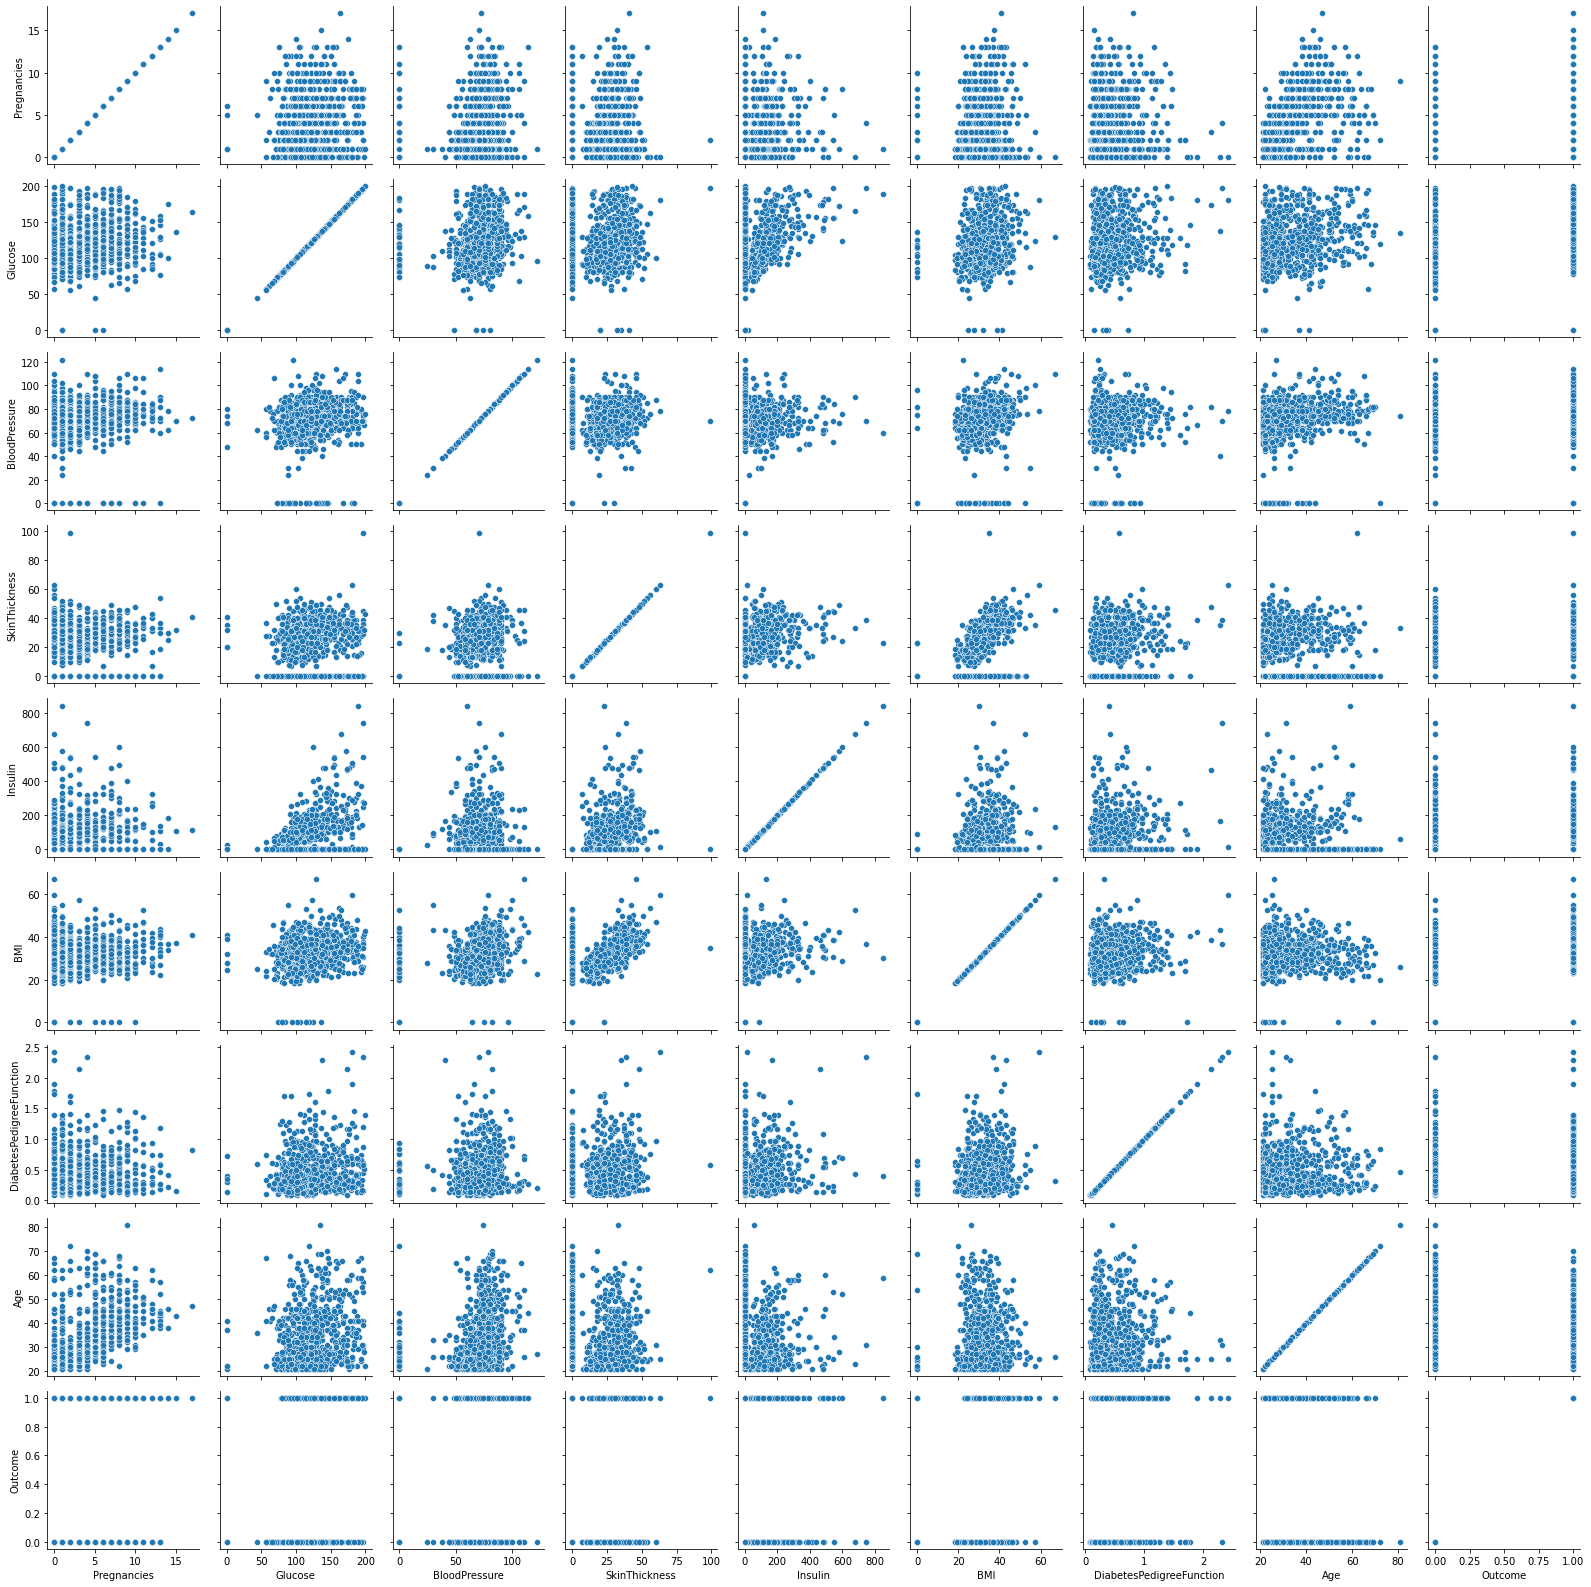

In [6]:
g=sns.PairGrid(data)
g.map(sns.scatterplot)

In [7]:
#Strong correlation between certain variables
#Heavy impact of certain variables on the Outcome as well


#Checking how many value in particular columns are zero
print((data.BloodPressure==0).sum(axis=0))
print((data.SkinThickness==0).sum(axis=0))
print((data.BMI==0).sum(axis=0))
print((data.Glucose==0).sum(axis=0))
print((data.Insulin==0).sum(axis=0))

35
227
11
5
374


In [8]:
#Visualizations of the data(KFA)
#Avoid depending on excel to understand data, rely only in the packages/libraries provided

#V1 Horizontal barplot of the percentages of diabetics and non-diabetics(values and percentages),though it can be inferred from the mean of the Outcome

#Creating table with columns outcome and pregnancies
group_outcome=data.groupby('Outcome')['Pregnancies'].count().reset_index()
#Rename Pregnancies, Count
group_outcome.rename(columns={'Pregnancies':'Count'},inplace=True)
#Lets add a percentages column to the table
#round function rounds off the percentage to 2 places
#sum fucntion adds both values of the column Outcome
group_outcome['Percentages']=round(group_outcome['Count']/sum(group_outcome['Count'])*100,2)

group_outcome.head()

,Outcome,Count,Percentages
0,0,500,65.1
1,1,268,34.9


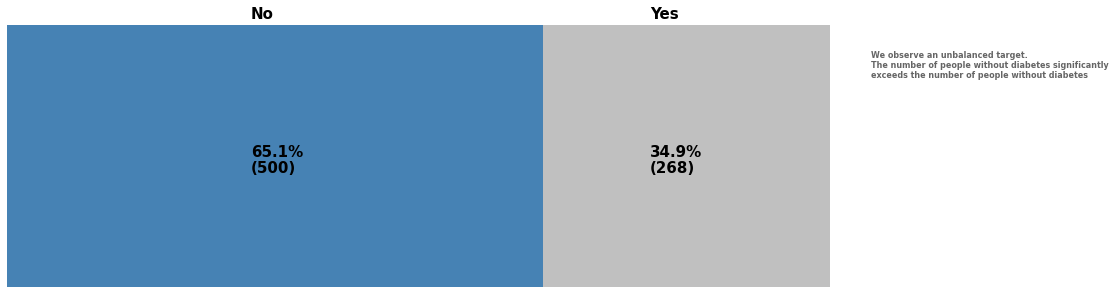

In [9]:
#We observe an unbalanced target,non-diabetics are much more than the diabetics

#Plotting the figure 
fig=plt.figure(figsize=(12,4))

#Adding the axes
axes=fig.add_axes([0,0,1,1])

#Making a horizontal bar plot

#annotations within 
axes.barh(y=0,width=group_outcome['Percentages'][0]+group_outcome['Percentages'][1],height=0.8,color='silver')
axes.barh(y=0,width=group_outcome['Percentages'][0],height=0.8,color='steelblue')
non_diabetic_perc=axes.text(x=group_outcome['Percentages'][0]/2.2,y=0,s=f"{group_outcome['Percentages'][0]}%",fontsize=15,fontweight='bold')
diabetics_perc=axes.text(x=(group_outcome['Percentages'][0]+group_outcome['Percentages'][1])/1.28,y=0,s=f"{group_outcome['Percentages'][1]}%",fontsize=15,fontweight='bold')
non_diabetics_num=axes.text(x=group_outcome['Percentages'][0]/2.2,y=-0.05,s=f"({group_outcome['Count'][0]})",fontsize=15,fontweight='bold')
diabetics_num=axes.text(x=(group_outcome['Percentages'][0]+group_outcome['Percentages'][1])/1.28,y=-0.05,s=f"({group_outcome['Count'][1]})",fontsize=15,fontweight='bold')

#title
axes.text(y=0.42,x=group_outcome['Percentages'][0]/2.2,s='No',fontsize=15,fontweight='bold')
axes.text(y=0.42,x=(group_outcome['Percentages'][0]+group_outcome['Percentages'][1])/1.28,s='Yes',fontsize=15,fontweight='bold')

#conclusion
axes.text(y=0.3,x=105,s="We observe an unbalanced target.",fontsize=8,fontweight='bold',alpha=0.6,color='black')
axes.text(y=0.27,x=105,s="The number of people without diabetes significantly",fontsize=8,fontweight='bold',alpha=0.6,color='black')
axes.text(y=0.24,x=105,s="exceeds the number of people without diabetes",fontsize=8,fontweight='bold',alpha=0.6,color='black')
#axis
axes.axis('off')

fig.show()

In [10]:
#Comparing the chances of diabetes between different age groups by make a line graph for number of diabetics and non-diabetics for each

#non-diabetics
data_age_no=data[data['Outcome']==0]['Age'].value_counts().to_frame().reset_index()
data_age_no.rename(columns={'index':'Age','Age':'Count'},inplace=True)
data_age_no.sort_values(by='Age', inplace=True)
data_age_no.reset_index(inplace=True)
data_age_no.drop('index',axis=1,inplace=True)
print(data_age_no.head())

#diabetics
data_age_yes=data[data['Outcome']==1]['Age'].value_counts().to_frame().reset_index()
data_age_yes.rename(columns={'index':'Age','Age':'Count'},inplace=True)
data_age_yes.sort_values(by='Age',inplace=True)
data_age_yes.reset_index(inplace=True)
data_age_yes.drop('index',axis=1,inplace=True)
print(data_age_yes.head())

print(data_age_no.shape)
print(data_age_yes.shape)


   Age  Count
0   21     58
1   22     61
2   23     31
3   24     38
4   25     34
   Age  Count
0   21      5
1   22     11
2   23      7
3   24      8
4   25     14
(51, 2)
(45, 2)


In [11]:
print(data_age_no.describe()) 
print(data_age_yes.describe())


             Age      Count
count  51.000000  51.000000
mean   46.235294   9.803922
std    15.327868  13.573532
min    21.000000   1.000000
25%    33.500000   2.000000
50%    46.000000   4.000000
75%    58.500000  10.500000
max    81.000000  61.000000
             Age      Count
count  45.000000  45.000000
mean   43.244444   5.955556
std    13.564921   3.789672
min    21.000000   1.000000
25%    32.000000   3.000000
50%    43.000000   5.000000
75%    54.000000   8.000000
max    70.000000  14.000000


In [12]:
#table, no count included
from scipy.stats import iqr
stats_no=[]
for x in data_age_no['Age'].describe()[1:]:
    stats_no.append(round(x,2))
stats_no.append(iqr(data_age_no['Age']))
stats_yes=[]
for y in data_age_yes['Age'].describe()[1:]:
    stats_yes.append(round(y,2))
stats_yes.append(iqr(data_age_yes['Age']))
    
print(stats_no)
print(stats_yes)

[46.24, 15.33, 21.0, 33.5, 46.0, 58.5, 81.0, 25.0]
[43.24, 13.56, 21.0, 32.0, 43.0, 54.0, 70.0, 22.0]


In [13]:
list_parameters=['mean','std','min','25%','median','75%','max','IQR']
data_stats=pd.DataFrame({'Parameters':list_parameters,'No':stats_no,'Yes':stats_yes})
print(data_stats)
print(len(data_stats))
list_=[]
for n in range(len(data_stats)):
    x=data_stats.loc[n,:]
    list_.append(x)
print(list_)

  Parameters     No    Yes
0       mean  46.24  43.24
1        std  15.33  13.56
2        min  21.00  21.00
3        25%  33.50  32.00
4     median  46.00  43.00
5        75%  58.50  54.00
6        max  81.00  70.00
7        IQR  25.00  22.00
8
[Parameters     mean
No            46.24
Yes           43.24
Name: 0, dtype: object, Parameters      std
No            15.33
Yes           13.56
Name: 1, dtype: object, Parameters     min
No            21.0
Yes           21.0
Name: 2, dtype: object, Parameters     25%
No            33.5
Yes           32.0
Name: 3, dtype: object, Parameters    median
No              46.0
Yes             43.0
Name: 4, dtype: object, Parameters     75%
No            58.5
Yes           54.0
Name: 5, dtype: object, Parameters     max
No            81.0
Yes           70.0
Name: 6, dtype: object, Parameters     IQR
No            25.0
Yes           22.0
Name: 7, dtype: object]


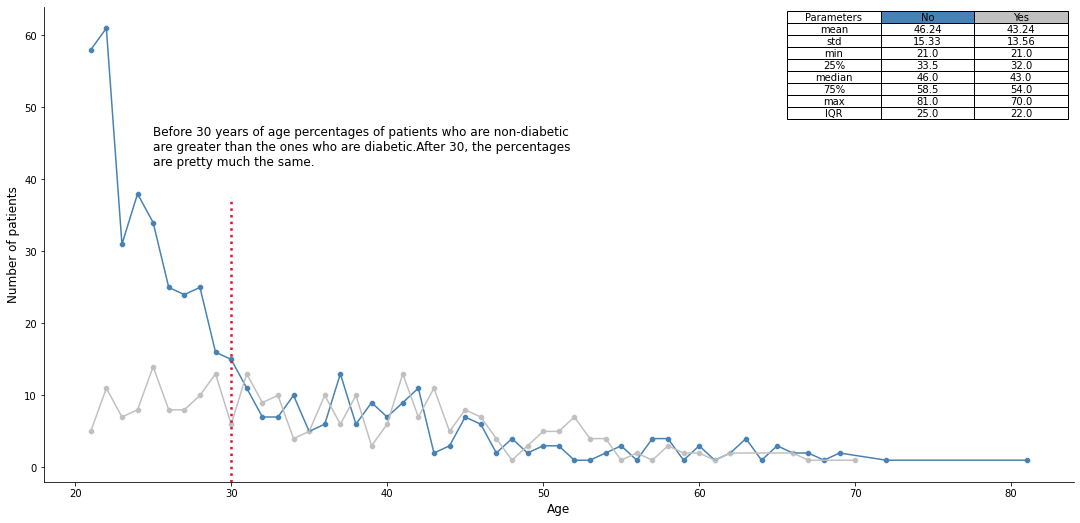

In [14]:
#table colours
colour_list=[['white','white','white']]

#PLotting figure, arg width.height in inches
fig=plt.figure(figsize=(13,6))

#Setting the axes for the line graph for non-diabetics and diabetics and a statistics table in the top right corner 
axes1=fig.add_axes([0,0,1.1,1.1])
axes2=fig.add_axes([0.8,0.6,0.3,0.5])

#line graphs using seaborn 
sns.lineplot(data=data_age_no,x='Age',y='Count',ax=axes1,color='steelblue')
sns.lineplot(data=data_age_yes,x='Age',y='Count',ax=axes1,color='silver')

#labels for the axes1
axes1.set_xlabel('Age',fontsize=12,color='black')
axes1.set_ylabel('Number of patients',fontsize=12,color='black')

#Scatter plots of the same datapoints
sns.scatterplot(data=data_age_no,x='Age',y='Count',ax=axes1,color='steelblue')
sns.scatterplot(data=data_age_yes,x='Age',y='Count',ax=axes1,color='silver')

#vertical line 
axes1.axvline(x=30,ymin=0,ymax=0.6,color='crimson',ls=':',lw=2.5)

#annotations of inferences
axes1.text(x=25,y=42,s="Before 30 years of age percentages of patients who are non-diabetic\nare greater than the ones who are diabetic.After 30, the percentages\nare pretty much the same.",color='black',fontsize=12)

#Removing certain spines
axes1.spines['top'].set_visible(False)
axes1.spines['right'].set_visible(False)

#adding the table to the top right corner 
axes2.axis('off')
table=axes2.table(cellColours=colour_list*8,cellText=list_,cellLoc='center',loc='upper right',colLabels=data_stats.columns,colColours=['white','steelblue','silver'])

fig.show()

In [15]:
#Comparison of Outcome with preganancies

#Pregnancies of all women 
data_preg=data.groupby('Pregnancies')['Outcome'].count().reset_index()
data_preg.rename(columns={'Outcome':'Count'},inplace=True)
print(data_preg)
#Creating an array for the x-axis ticks 
list_pregnancies=np.array(data_preg['Pregnancies'])

#Pregnancies of non-diabetic women
data_preg_no=data[data['Outcome']==0]['Pregnancies'].value_counts().to_frame().reset_index()
data_preg_no.rename(columns={'index':'Pregnancies','Pregnancies':'Count'},inplace=True)
data_preg_no.sort_values(by='Pregnancies',inplace=True)
data_preg_no.reset_index(inplace=True)
data_preg_no.drop('index',axis=1,inplace=True)
print(data_preg_no)

#Pregancies of diabetic women 
data_preg_yes=data[data['Outcome']==1]['Pregnancies'].value_counts().to_frame().reset_index()
data_preg_yes.rename(columns={'index':'Pregnancies','Pregnancies':'Count'},inplace=True)
data_preg_yes.sort_values(by='Pregnancies',inplace=True)
data_preg_yes.reset_index(inplace=True)
data_preg_yes.drop('index',axis=1,inplace=True)
print(data_preg_yes)

#Creating percentages of the same
series_no=data_preg_no['Count']
series_yes=data_preg_yes['Count']
series_all=data_preg['Count']
series_no_perc=round((series_no/series_all)*100,2)
series_yes_perc=round((series_yes/series_all)*100,2)
series_no_perc_list=series_no_perc.tolist()
series_yes_perc_list=series_yes_perc.tolist()
print(series_no_perc_list)
print(series_yes_perc_list)
print(list_pregnancies)
data_preg.dtypes

    Pregnancies  Count
0             0    111
1             1    135
2             2    103
3             3     75
4             4     68
5             5     57
6             6     50
7             7     45
8             8     38
9             9     28
10           10     24
11           11     11
12           12      9
13           13     10
14           14      2
15           15      1
16           17      1
    Pregnancies  Count
0             0     73
1             1    106
2             2     84
3             3     48
4             4     45
5             5     36
6             6     34
7             7     20
8             8     16
9             9     10
10           10     14
11           11      4
12           12      5
13           13      5
    Pregnancies  Count
0             0     38
1             1     29
2             2     19
3             3     27
4             4     23
5             5     21
6             6     16
7             7     25
8             8     22
9          

Pregnancies    int64
Count          int64
dtype: object

Text(0, 110, 'Distribution of Pregancies by Percentages of Diabetics and Non-diabetics')

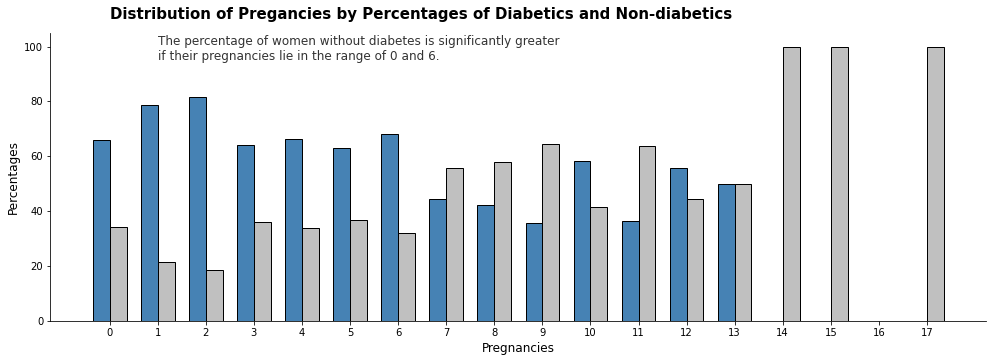

In [16]:
#Plotting a vertical bar graphs 

#Figure
fig=plt.figure(figsize=(13,4))

#Adding axes
axes=fig.add_axes([0,0,1,1])

#Plotting of the bar graphs
x=list_pregnancies
w=0.35
#Bars for non-diabetics
axes.bar(x=x-w/2,height=series_no_perc_list,width=0.35,color='steelblue',edgecolor='black')
#Bar for diabetics
axes.bar(x=x+w/2,height=series_yes_perc_list,width=0.35,color='silver',edgecolor='black')

#Adding labels 
axes.set_xlabel('Pregnancies',fontsize=12,color='black')
axes.set_ylabel('Percentages',fontsize=12,color='black')

#Adding ticks to the x-axis, leaving  the y-axis as it looks tidy
n=np.arange(0,18,1)
axes.set_xticks(n)

#Removing the boundaries on the right and the one on top
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

#annotations of inferences
axes.text(x=1,y=95,s='The percentage of women without diabetes is significantly greater\nif their pregnancies lie in the range of 0 and 6.',fontsize=12,color='black',alpha=0.8)

#title
axes.text(x=0,y=110,s='Distribution of Pregancies by Percentages of Diabetics and Non-diabetics',fontsize=15,fontweight='bold')

In [17]:
data['Outcome'].replace({0:'No',1:'Yes'},inplace=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


109.98
141.25746268656715


Text(0.5, 1.0, 'Mean of glucose in patients without diabetes-109.28')

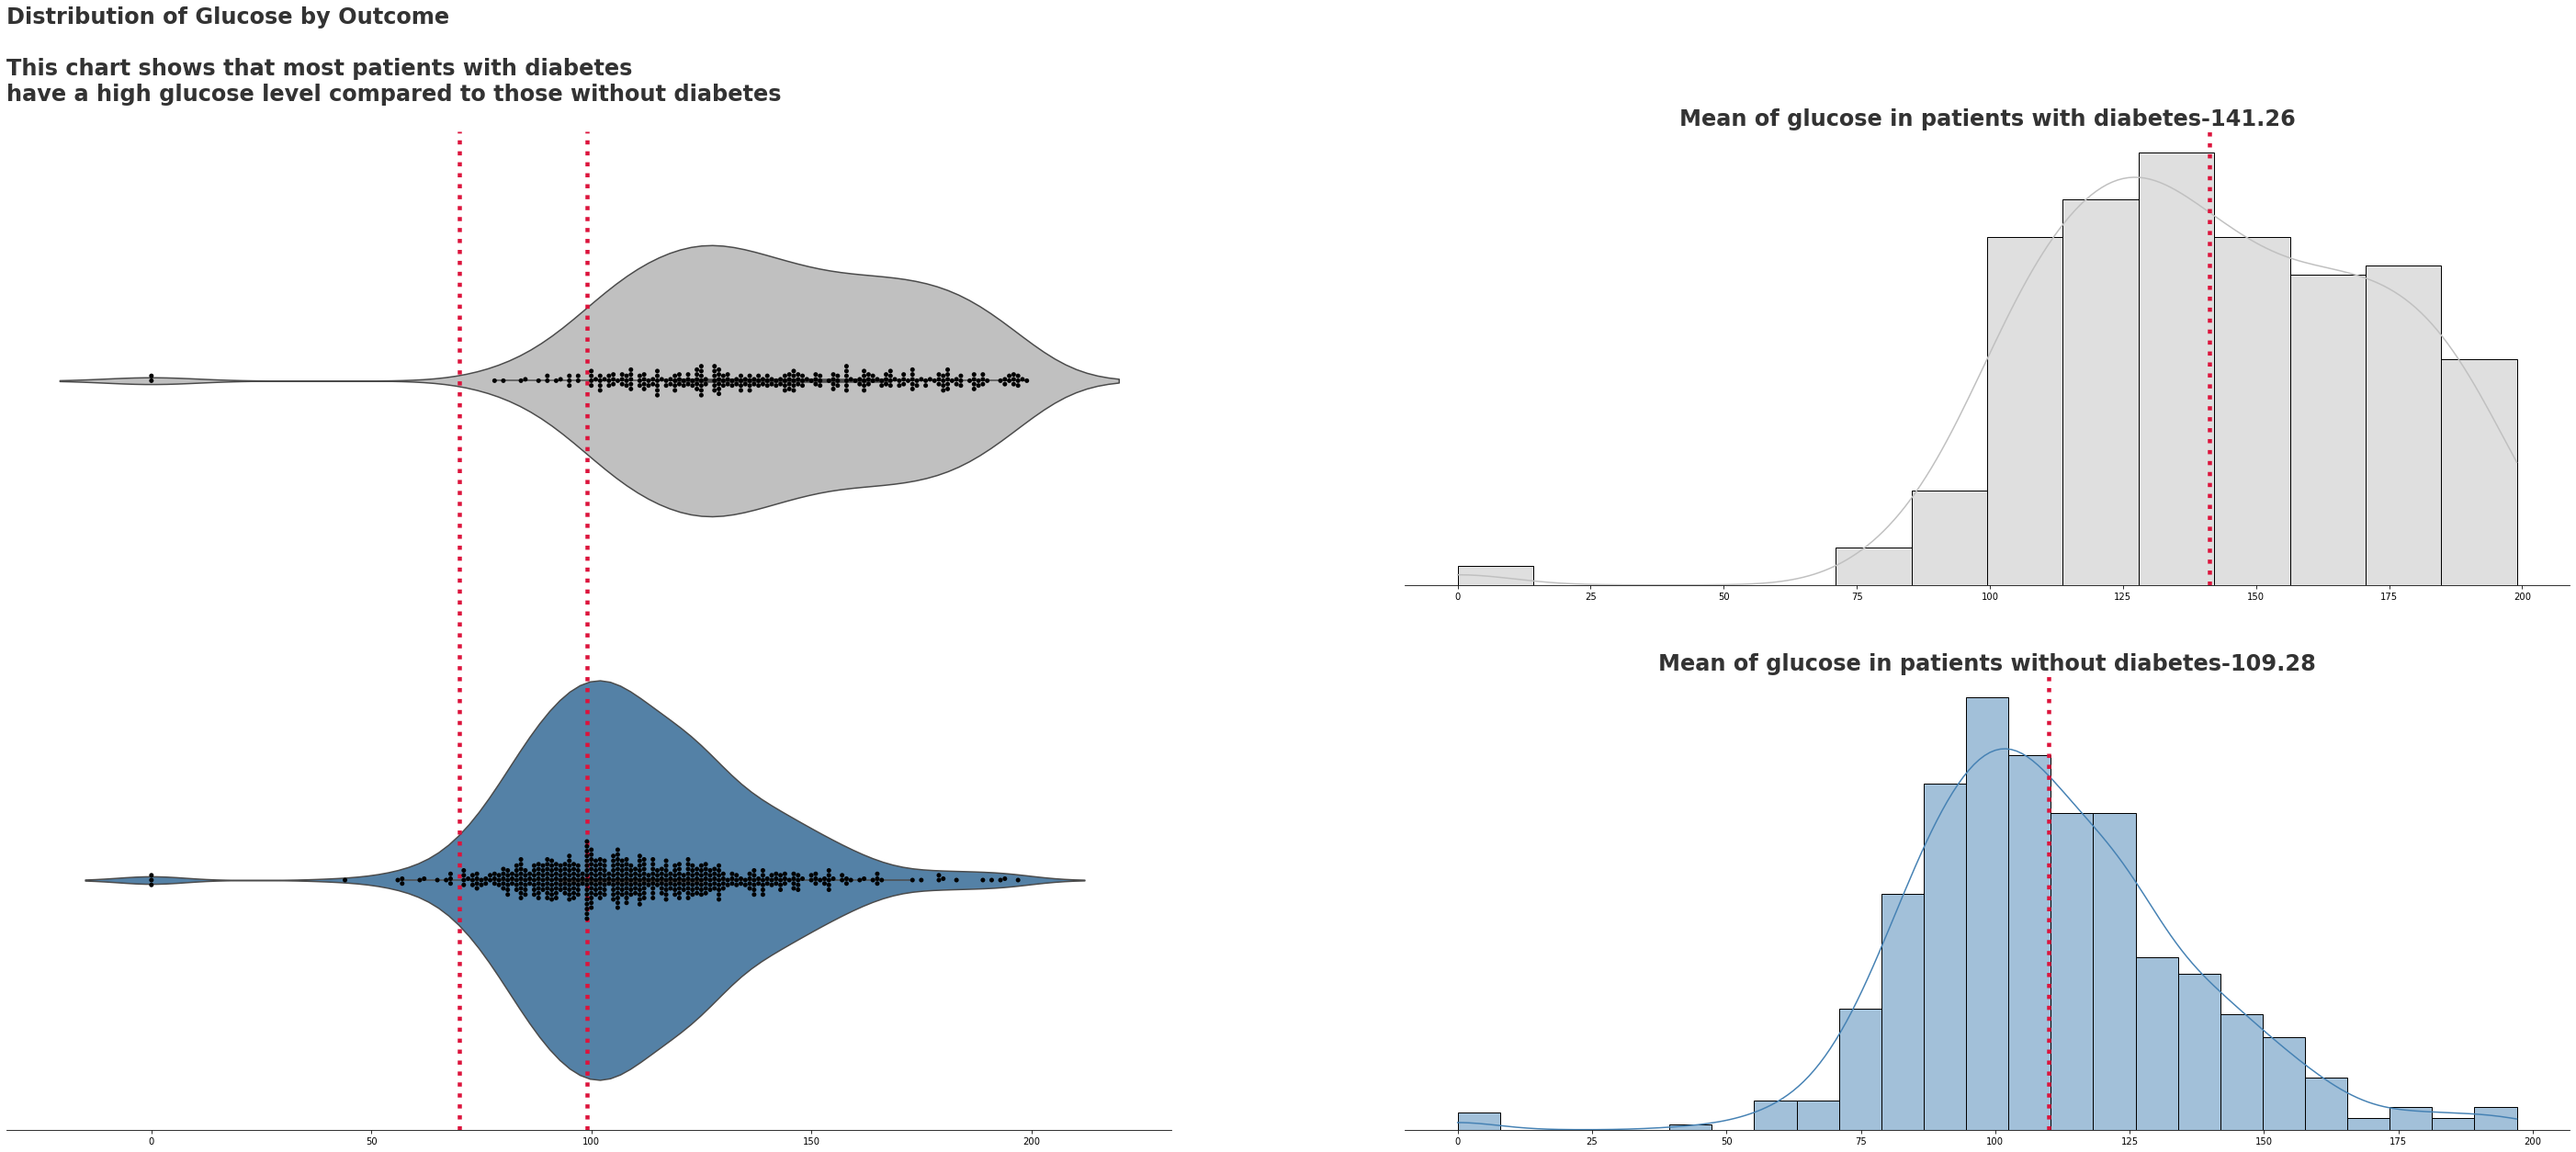

In [18]:
#Glucose and Outcome correlation for diabetics and non-diabetics

#figure/subplots
fig,axes=plt.subplots(2,2,figsize=(50,20)) 
gs=axes[0,0].get_gridspec() 
for ax in axes[0:,0]: 
    ax.remove() 
axes_big=fig.add_subplot(gs[0:,0])

#violinplots 
data_glucose_no=data[data['Outcome']=='No']['Glucose'] 
data_glucose_yes=data[data['Outcome']=='Yes']['Glucose'] 
sns.violinplot(x=data['Glucose'],y=data['Outcome'],ax=axes_big,palette=['silver','steelblue'])

#swarmplots 
sns.swarmplot(x=data['Glucose'],y=data['Outcome'],ax=axes_big,color='black')

#distplots 
sns.histplot(data=data,x=data_glucose_no,ax=axes[1,1],color='steelblue',kde=True) 
sns.histplot(data=data,x=data_glucose_yes,ax=axes[0,1],color='silver',kde=True)

#Marking the upper and lower limits of the normal glucose 
axes_big.axvline(x=70,ls=':',color='crimson',lw=4.5) 
axes_big.axvline(x=99,ls=':',color='crimson',lw=4.5) 
axes[0,1].axvline(x=data_glucose_yes.mean(),color='crimson',ls=':',lw=4.5) 
axes[1,1].axvline(x=data_glucose_no.mean(),color='crimson',ls=':',lw=4.5)

#Means and counts 
print(data_glucose_no.mean()) 
print(data_glucose_yes.mean())

#Removing certain spines,ticks 
sp=['left','top','right'] 
for i in sp: 
    axes_big.spines[i].set_visible(False) 
    axes[0,1].spines[i].set_visible(False) 
    axes[1,1].spines[i].set_visible(False) 
    axes_big.set_yticks([]) 
    axes[0,1].set_yticks([]) 
    axes[1,1].set_yticks([]) 
    axes_big.set_xlabel(None) 
    axes_big.set_ylabel(None) 
    axes[0,1].set_xlabel(None) 
    axes[0,1].set_ylabel(None) 
    axes[1,1].set_xlabel(None) 
    axes[1,1].set_ylabel(None)

#Adding titles of relevance to the subplots 
axes_big.set_title("Distribution of Glucose by Outcome\n\nThis chart shows that most patients with diabetes\nhave a high glucose level compared to those without diabetes.\n",loc='left',fontsize=24,fontweight='bold',alpha=0.8) 
axes[0,1].set_title("Mean of glucose in patients with diabetes-141.26",fontsize=24,fontweight='bold',alpha=0.8) 
axes[1,1].set_title("Mean of glucose in patients without diabetes-109.28",fontsize=24,fontweight='bold',alpha=0.8)


#if else conditionals on dataframe reqd

Text(0, 0.5, 'Skin Thickness')

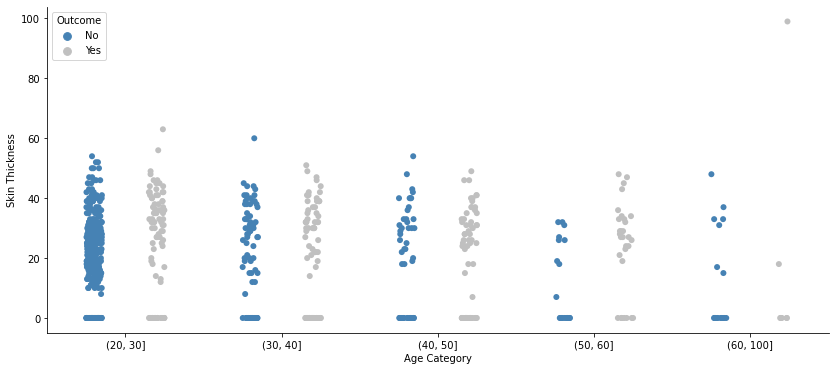

In [73]:
#SkinThickess analysis

#Creating categories of age 
data['Age_category']=pd.cut(x=data['Age'],bins=[20,30,40,50,60,100])
data['Age_category'].astype(str)
data['Age_category'].replace({'(20, 30]':'21-30','(30, 40]':'31-40','(40, 50]':'41-50','(50, 60]':'51-60','(60, 100]':'60+'},inplace=True)
data_age_category=data.sort_values(by='Age_category')

#figure/subplots
fig,axes=plt.subplots(1,1,figsize=(14,6))

#stripplot
sns.stripplot(x=data_age_category['Age_category'],y=data_age_category['SkinThickness'],hue=data_age_category['Outcome'],palette=['steelblue','silver'],dodge=True,size=6)

#Removing spines,ticks etc.
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlabel('Age Category')
axes.set_ylabel('Skin Thickness')



#x-axis ticks not changing, as I ma unable to replace the categorical variable, categorical variable notchnaging to object

68.792
100.33582089552239


Text(0.5, 1.0, 'Mean of insulin in patients without diabetes-100.36')

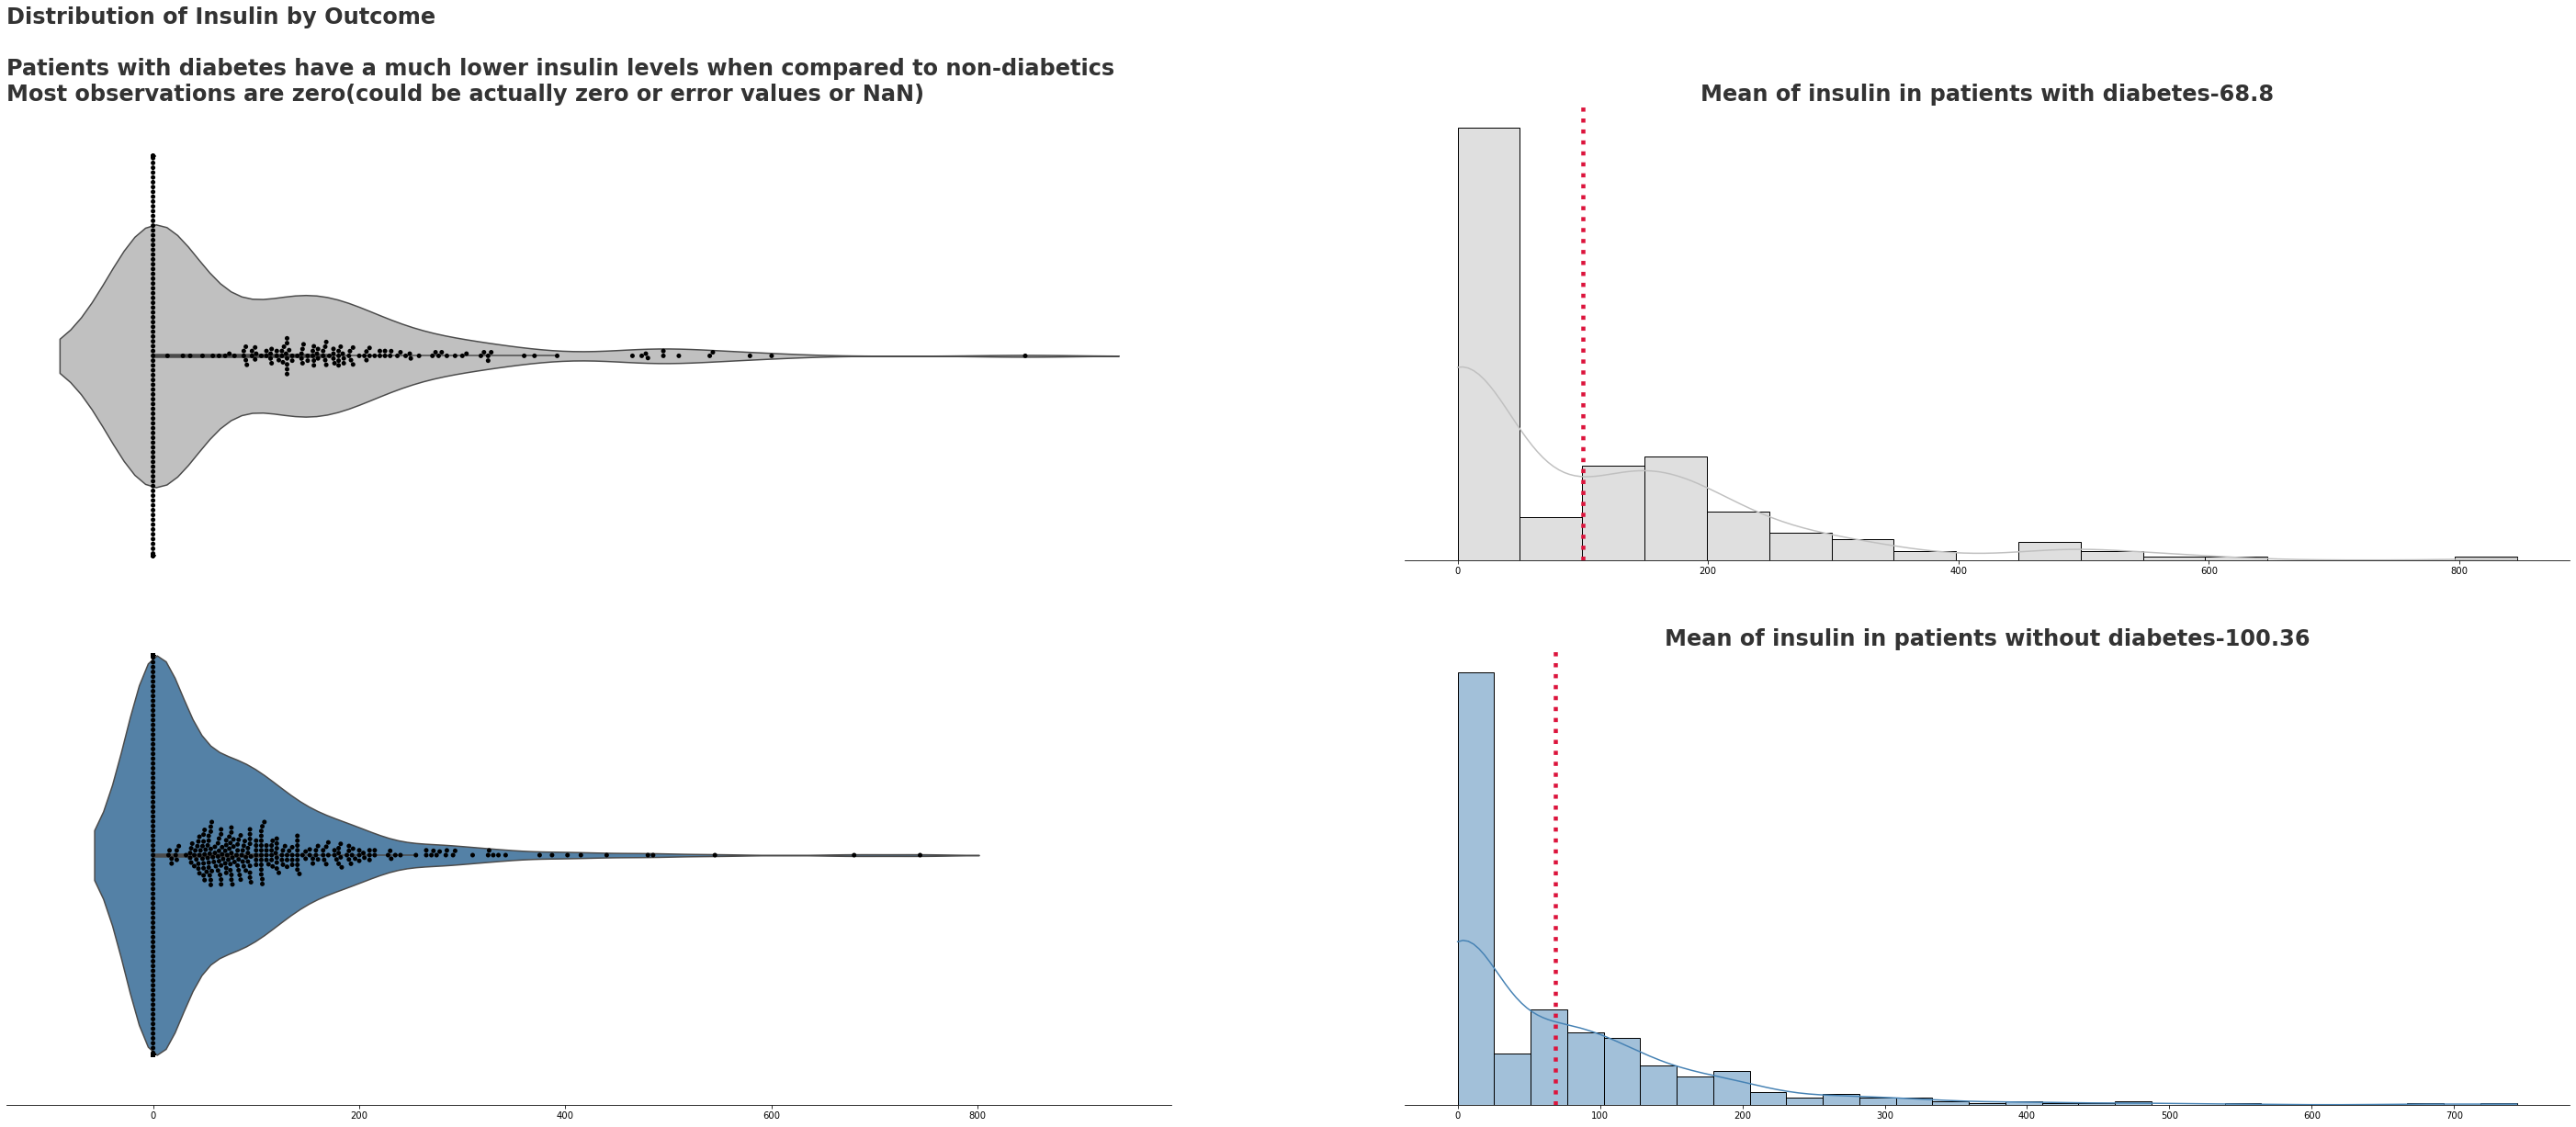

In [25]:
# Insulin and Outcome correlation for diabetics and non-diabetics

#figure/subplots
fig,axes=plt.subplots(2,2,figsize=(50,20)) 
gs=axes[0,0].get_gridspec() 
for ax in axes[0:,0]: 
    ax.remove() 
axes_big=fig.add_subplot(gs[0:,0])

#violinplots 
data_insulin_no=data[data['Outcome']=='No']['Insulin'] 
data_insulin_yes=data[data['Outcome']=='Yes']['Insulin'] 
sns.violinplot(x=data['Insulin'],y=data['Outcome'],ax=axes_big,palette=['silver','steelblue'])

#swarmplots 
sns.swarmplot(x=data['Insulin'],y=data['Outcome'],ax=axes_big,color='black')

#distplots 
sns.histplot(data=data,x=data_insulin_no,ax=axes[1,1],color='steelblue',kde=True) 
sns.histplot(data=data,x=data_insulin_yes,ax=axes[0,1],color='silver',kde=True)

#Marking the upper and lower limits of the normal glucose 
#axes_big.axvline(x=59,ls=':',color='crimson',lw=4.5) 
#axes_big.axvline(x=99,ls=':',color='crimson',lw=4.5) 
axes[0,1].axvline(x=data_insulin_yes.mean(),color='crimson',ls=':',lw=4.5) 
axes[1,1].axvline(x=data_insulin_no.mean(),color='crimson',ls=':',lw=4.5)

#Means and counts 
print(data_insulin_no.mean()) 
print(data_insulin_yes.mean())

#Removing certain spines,ticks 
sp=['left','top','right'] 
for i in sp: 
    axes_big.spines[i].set_visible(False) 
    axes[0,1].spines[i].set_visible(False) 
    axes[1,1].spines[i].set_visible(False) 
    axes_big.set_yticks([]) 
    axes[0,1].set_yticks([]) 
    axes[1,1].set_yticks([]) 
    axes_big.set_xlabel(None) 
    axes_big.set_ylabel(None) 
    axes[0,1].set_xlabel(None) 
    axes[0,1].set_ylabel(None) 
    axes[1,1].set_xlabel(None) 
    axes[1,1].set_ylabel(None)

#Adding titles of relevance to the subplots 
axes_big.set_title("Distribution of Insulin by Outcome\n\nPatients with diabetes have a much lower insulin levels when compared to non-diabetics\nMost observations are zero(could be actually zero or error values or NaN)",loc='left',fontsize=24,fontweight='bold',alpha=0.8) 
axes[0,1].set_title("Mean of insulin in patients with diabetes-68.8",fontsize=24,fontweight='bold',alpha=0.8) 
axes[1,1].set_title("Mean of insulin in patients without diabetes-100.36",fontsize=24,fontweight='bold',alpha=0.8)


#if else conditionals on dataframe reqd

30.30419999999996
35.14253731343278


Text(0.5, 1.0, 'Mean BMI of patients without diabetes-35.14')

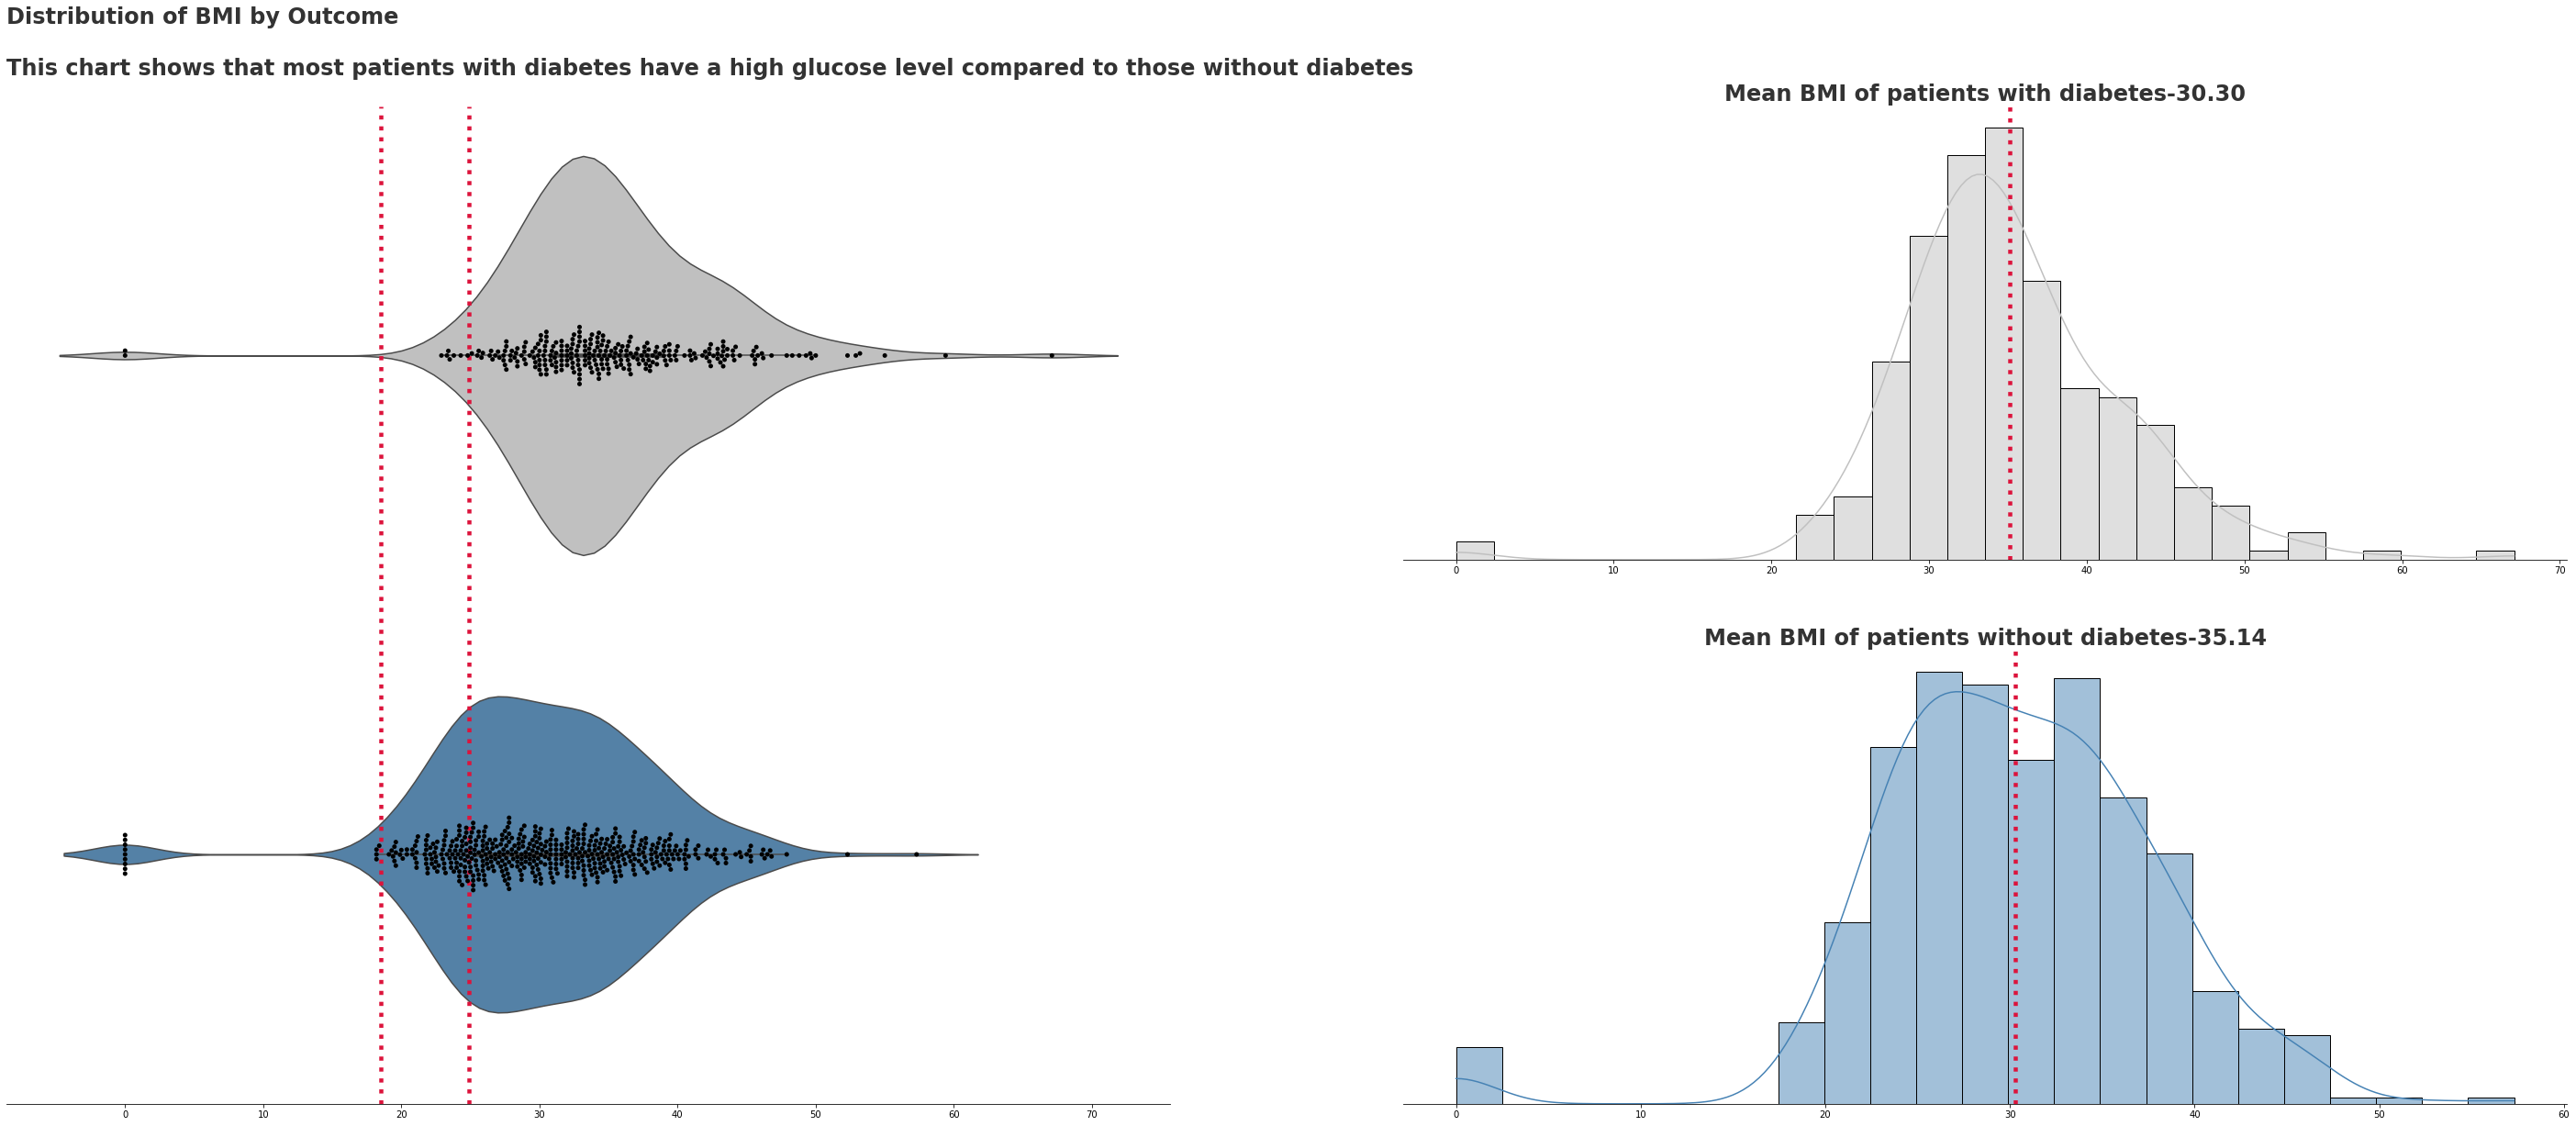

In [22]:
#Relationship between BMI and the Outcome

#figure/subplots
fig,axes=plt.subplots(2,2,figsize=(50,20)) 
gs=axes[0,0].get_gridspec() 
for ax in axes[0:,0]: 
    ax.remove() 
axes_big=fig.add_subplot(gs[0:,0])

#violinplots 
data_bmi_no=data[data['Outcome']=='No']['BMI'] 
data_bmi_yes=data[data['Outcome']=='Yes']['BMI'] 
sns.violinplot(x=data['BMI'],y=data['Outcome'],ax=axes_big,palette=['silver','steelblue'])

#swarmplots 
sns.swarmplot(x=data['BMI'],y=data['Outcome'],ax=axes_big,color='black')

#distplots 
sns.histplot(data=data,x=data_bmi_no,ax=axes[1,1],color='steelblue',kde=True) 
sns.histplot(data=data,x=data_bmi_yes,ax=axes[0,1],color='silver',kde=True)

#Marking the upper and lower limits of the normal glucose 
axes_big.axvline(x=18.5,ls=':',color='crimson',lw=4.5) 
axes_big.axvline(x=24.9,ls=':',color='crimson',lw=4.5) 
axes[0,1].axvline(x=data_bmi_yes.mean(),color='crimson',ls=':',lw=4.5) 
axes[1,1].axvline(x=data_bmi_no.mean(),color='crimson',ls=':',lw=4.5)

#Means and counts 
print(data_bmi_no.mean()) 
print(data_bmi_yes.mean())

#Removing certain spines,ticks 
sp=['left','top','right'] 
for i in sp: 
    axes_big.spines[i].set_visible(False) 
    axes[0,1].spines[i].set_visible(False) 
    axes[1,1].spines[i].set_visible(False) 
    axes_big.set_yticks([]) 
    axes[0,1].set_yticks([]) 
    axes[1,1].set_yticks([]) 
    axes_big.set_xlabel(None) 
    axes_big.set_ylabel(None) 
    axes[0,1].set_xlabel(None) 
    axes[0,1].set_ylabel(None) 
    axes[1,1].set_xlabel(None) 
    axes[1,1].set_ylabel(None)

#Adding titles of relevance to the subplots 
axes_big.set_title("Distribution of BMI by Outcome\n\nThis chart shows that most patients with diabetes have a high glucose level compared to those without diabetes\n",loc='left',fontsize=24,fontweight='bold',alpha=0.8) 
axes[0,1].set_title("Mean BMI of patients with diabetes-30.30",fontsize=24,fontweight='bold',alpha=0.8) 
axes[1,1].set_title("Mean BMI of patients without diabetes-35.14",fontsize=24,fontweight='bold',alpha=0.8)



#if else conditionals on dataframe reqd